In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
car_data=pd.read_csv("cardata.csv")

In [3]:
car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [4]:
type(car_data)

pandas.core.frame.DataFrame

In [5]:
car_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [6]:
df=car_data.copy()

In [7]:
df.drop('Model',axis=1,inplace=True)

In [8]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [9]:
ohe= pd.get_dummies(df['Transmission'])

In [10]:
ohe

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2054,0,1
2055,0,1
2056,0,1
2057,1,0


In [11]:
df=pd.concat([df,ohe],axis=1)

In [12]:
df=df.drop('Transmission',axis=1)

In [13]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,Manual
0,Honda,505000,2017,87150,Petrol,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,0,1
1,Maruti Suzuki,450000,2014,75000,Diesel,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,0,1
2,Hyundai,220000,2011,67000,Petrol,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,0,1
3,Toyota,799000,2019,37500,Petrol,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,0,1
4,Toyota,1950000,2018,69000,Diesel,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,0,1
2055,Hyundai,275000,2014,83000,Petrol,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,0,1
2056,Ford,240000,2013,73000,Petrol,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,0,1
2057,BMW,4290000,2018,60474,Diesel,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,1,0


In [14]:
df.value_counts('Location')

Location
Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Rohtak                1
Siliguri              1
Faizabad              1
Pimpri-Chinchwad      1
Valsad                1
Length: 77, dtype: int64

In [15]:
df['Location'].nunique()

77

In [16]:
df[df['Location']=='Pune']['Price'].mean()

1977763.875

In [17]:
prices=df.groupby('Location')['Price'].mean()

In [18]:
prices

Location
Agra            7.888947e+05
Ahmedabad       1.507257e+06
Allahabad       5.250000e+05
Ambala Cantt    4.183333e+05
Amritsar        4.837500e+05
                    ...     
Valsad          5.800000e+05
Varanasi        5.589583e+05
Warangal        5.150000e+05
Yamunanagar     7.941667e+05
Zirakpur        6.656665e+05
Name: Price, Length: 77, dtype: float64

In [19]:
prices_location_dict= dict(prices)

In [20]:
df['Location']=df['Location'].replace(prices_location_dict)

In [21]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,Manual
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,0,1
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,0,1
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,0,1
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,0,1
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,0,1
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,0,1
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,0,1
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,1,0


In [22]:
ohe1= pd.get_dummies(df['Fuel Type'])

In [23]:
df=pd.concat([df,ohe1],axis=1)

In [24]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,...,Manual,CNG,CNG + CNG,Diesel,Electric,Hybrid,LPG,Petrol,Petrol + CNG,Petrol + LPG
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,1198 cc,...,1,0,0,0,0,0,0,1,0,0
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,1248 cc,...,1,0,0,1,0,0,0,0,0,0
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,1197 cc,...,1,0,0,0,0,0,0,1,0,0
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,1197 cc,...,1,0,0,0,0,0,0,1,0,0
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,2393 cc,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,2179 cc,...,1,0,0,1,0,0,0,0,0,0
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,814 cc,...,1,0,0,0,0,0,0,1,0,0
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,1196 cc,...,1,0,0,0,0,0,0,1,0,0
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,1995 cc,...,0,0,0,1,0,0,0,0,0,0


In [25]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,...,Manual,CNG,CNG + CNG,Diesel,Electric,Hybrid,LPG,Petrol,Petrol + CNG,Petrol + LPG
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,1198 cc,...,1,0,0,0,0,0,0,1,0,0
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,1248 cc,...,1,0,0,1,0,0,0,0,0,0
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,1197 cc,...,1,0,0,0,0,0,0,1,0,0
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,1197 cc,...,1,0,0,0,0,0,0,1,0,0
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,2393 cc,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,2179 cc,...,1,0,0,1,0,0,0,0,0,0
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,814 cc,...,1,0,0,0,0,0,0,1,0,0
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,1196 cc,...,1,0,0,0,0,0,0,1,0,0
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,1995 cc,...,0,0,0,1,0,0,0,0,0,0


In [26]:
engine=df['Engine'].str.replace('cc','')

In [27]:
df.drop('Engine',axis=1,inplace=True)

In [28]:
pd.DataFrame(engine)

,Engine
0,1198
1,1248
2,1197
3,1197
4,2393
...,...
2054,2179
2055,814
2056,1196
2057,1995


In [29]:
pd.concat([df,engine],axis=1)

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Max Power,...,CNG,CNG + CNG,Diesel,Electric,Hybrid,LPG,Petrol,Petrol + CNG,Petrol + LPG,Engine
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,87 bhp @ 6000 rpm,...,0,0,0,0,0,0,1,0,0,1198
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,74 bhp @ 4000 rpm,...,0,0,1,0,0,0,0,0,0,1248
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,79 bhp @ 6000 rpm,...,0,0,0,0,0,0,1,0,0,1197
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,82 bhp @ 6000 rpm,...,0,0,0,0,0,0,1,0,0,1197
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,148 bhp @ 3400 rpm,...,0,0,1,0,0,0,0,0,0,2393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,138 bhp @ 3750 rpm,...,0,0,1,0,0,0,0,0,0,2179
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,55 bhp @ 5500 rpm,...,0,0,0,0,0,0,1,0,0,814
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,70 bhp @ 6250 rpm,...,0,0,0,0,0,0,1,0,0,1196
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,188 bhp @ 4000 rpm,...,0,0,1,0,0,0,0,0,0,1995


In [30]:
ohe2= pd.get_dummies(df['Color'])

In [31]:
df.drop('Color',axis=1,inplace=True)

In [32]:
pd.concat([df,ohe2],axis=1)

,Make,Price,Year,Kilometer,Fuel Type,Location,Owner,Seller Type,Max Power,Max Torque,...,Grey,Maroon,Orange,Others,Pink,Purple,Red,Silver,White,Yellow
0,Honda,505000,2017,87150,Petrol,1.977764e+06,First,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,...,1,0,0,0,0,0,0,0,0,0
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,Second,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,First,Individual,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,...,0,1,0,0,0,0,0,0,0,0
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,First,Individual,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,...,0,0,0,0,0,0,1,0,0,0
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,First,Individual,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,First,Individual,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,...,0,0,0,0,0,0,0,0,1,0
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,Second,Individual,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,...,0,0,0,0,0,0,0,0,1,0
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,First,Individual,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,...,0,0,0,0,0,0,0,1,0,0
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,First,Individual,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df.columns

Index(['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Location', 'Owner',
       'Seller Type', 'Max Power', 'Max Torque', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity',
       'Automatic', 'Manual', 'CNG', 'CNG + CNG', 'Diesel', 'Electric',
       'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder() 


In [35]:
owner=pd.DataFrame(label_encoder.fit_transform(df['Owner'].map({'First':6,'Second':5,'Third':4,'Fourth':3,'4 or More':2,'UnRegistered Car':1})))

In [36]:
df.drop('Owner',axis=1,inplace=True)

In [37]:
owner

,0
0,5
1,4
2,5
3,5
4,5
...,...
2054,5
2055,4
2056,5
2057,5


In [38]:
owner.columns= ['owner_encoded']

In [39]:
owner

,owner_encoded
0,5
1,4
2,5
3,5
4,5
...,...
2054,5
2055,4
2056,5
2057,5


In [40]:
df=pd.concat([df,owner],axis=1)

In [41]:
df['owner_encoded']

0       5
1       4
2       5
3       5
4       5
       ..
2054    5
2055    4
2056    5
2057    5
2058    5
Name: owner_encoded, Length: 2059, dtype: int64

In [42]:
df.drop('Fuel Type',axis=1,inplace=True)

In [43]:
df.drop('Make',axis=1,inplace=True)


In [44]:
df.columns = df.columns.str.strip()

In [45]:
df['Seller Type']

0        Corporate
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
2054    Individual
2055    Individual
2056    Individual
2057    Individual
2058    Individual
Name: Seller Type, Length: 2059, dtype: object

In [46]:
Seller=pd.get_dummies(df['Seller Type'])

In [47]:
df=pd.concat([df,Seller],axis=1)

In [48]:
df

,Price,Year,Kilometer,Location,Seller Type,Max Power,Max Torque,Drivetrain,Length,Width,...,Electric,Hybrid,LPG,Petrol,Petrol + CNG,Petrol + LPG,owner_encoded,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,...,0,0,0,1,0,0,5,0,1,0
1,450000,2014,75000,1.475745e+06,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,...,0,0,0,0,0,0,4,0,0,1
2,220000,2011,67000,9.643333e+05,Individual,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,...,0,0,0,1,0,0,5,0,0,1
3,799000,2019,37500,7.424000e+05,Individual,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,...,0,0,0,1,0,0,5,0,0,1
4,1950000,2018,69000,1.721570e+06,Individual,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,...,0,0,0,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,Individual,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,...,0,0,0,0,0,0,5,0,0,1
2055,275000,2014,83000,1.507257e+06,Individual,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,...,0,0,0,1,0,0,4,0,0,1
2056,240000,2013,73000,1.149000e+06,Individual,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,...,0,0,0,1,0,0,5,0,0,1
2057,4290000,2018,60474,1.385207e+06,Individual,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,...,0,0,0,0,0,0,5,0,0,1


In [49]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG',
       'CNG + CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol',
       'Petrol + CNG', 'Petrol + LPG', 'owner_encoded',
       'Commercial Registration', 'Corporate', 'Individual'],
      dtype='object')

In [50]:
drive=pd.get_dummies(df['Drivetrain'])

In [51]:
df=pd.concat([df,drive],axis=1)

In [52]:
df.drop('Drivetrain',axis=1,inplace=True)

In [53]:
df

,Price,Year,Kilometer,Location,Seller Type,Max Power,Max Torque,Length,Width,Height,...,Petrol,Petrol + CNG,Petrol + LPG,owner_encoded,Commercial Registration,Corporate,Individual,AWD,FWD,RWD
0,505000,2017,87150,1.977764e+06,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,3990.0,1680.0,1505.0,...,1,0,0,5,0,1,0,0,1,0
1,450000,2014,75000,1.475745e+06,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,3995.0,1695.0,1555.0,...,0,0,0,4,0,0,1,0,1,0
2,220000,2011,67000,9.643333e+05,Individual,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,3585.0,1595.0,1550.0,...,1,0,0,5,0,0,1,0,1,0
3,799000,2019,37500,7.424000e+05,Individual,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,3995.0,1745.0,1510.0,...,1,0,0,5,0,0,1,0,1,0
4,1950000,2018,69000,1.721570e+06,Individual,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,4735.0,1830.0,1795.0,...,0,0,0,5,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,Individual,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,4585.0,1890.0,1785.0,...,0,0,0,5,0,0,1,0,1,0
2055,275000,2014,83000,1.507257e+06,Individual,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,3495.0,1550.0,1500.0,...,1,0,0,4,0,0,1,0,1,0
2056,240000,2013,73000,1.149000e+06,Individual,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,3795.0,1680.0,1427.0,...,1,0,0,5,0,0,1,0,1,0
2057,4290000,2018,60474,1.385207e+06,Individual,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,4936.0,1868.0,1479.0,...,0,0,0,5,0,0,1,0,0,1


In [54]:
import pandas as pd
import re
import numpy as np

# Function to extract torque and RPM, then compute power
def compute_power(torque_str):
    if isinstance(torque_str, str):  # Check if the input is a string
        match = re.search(r'(\d+\.?\d*) Nm @ (\d+\.?\d*) rpm', torque_str)
        if match:
            torque = float(match.group(1))  # Torque in Nm
            rpm = float(match.group(2))  # RPM
            # Calculate power using the formula: Power (W) = Torque (Nm) * RPM * 2π / 60
            power_watts = torque * rpm * (2 * np.pi) / 60
            # Convert power to horsepower (1 hp = 745.7 W)
            power_hp = power_watts / 745.7
            return power_hp
    return None  # Return None if input is not a valid string

# Assuming df is your DataFrame, apply the function
df['Combined_Power_hp'] = df['Max Torque'].apply(compute_power)

# Display the DataFrame with the new column
print(df[['Max Torque', 'Combined_Power_hp']])



                  Max Torque  Combined_Power_hp
0          109 Nm @ 4500 rpm          68.881641
1          190 Nm @ 2000 rpm          53.363963
2     112.7619 Nm @ 4000 rpm          63.341282
3          113 Nm @ 4200 rpm          66.648781
4          343 Nm @ 1400 rpm          67.435197
...                      ...                ...
2054       330 Nm @ 1600 rpm          74.147822
2055        75 Nm @ 4000 rpm          42.129444
2056       102 Nm @ 4000 rpm          57.296044
2057       400 Nm @ 1750 rpm          98.302036
2058       195 Nm @ 1400 rpm          38.337794

[2059 rows x 2 columns]


In [55]:
df['Combined_Power_hp'].isna().sum()

208

In [56]:
 df['Combined_Power_hp'].fillna(df['Combined_Power_hp'].mean(),inplace=True)

In [57]:
df['Combined_Power_hp'].isna().sum()

0

In [58]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG', 'CNG + CNG',
       'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG',
       'Petrol + LPG', 'owner_encoded', 'Commercial Registration', 'Corporate',
       'Individual', 'AWD', 'FWD', 'RWD', 'Combined_Power_hp'],
      dtype='object')

In [59]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG', 'CNG + CNG',
       'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG',
       'Petrol + LPG', 'owner_encoded', 'Commercial Registration', 'Corporate',
       'Individual', 'AWD', 'FWD', 'RWD', 'Combined_Power_hp'],
      dtype='object')

In [60]:
import re
import pandas as pd

# Function to combine power and RPM into a ratio
def combine_power_RPM(power_str):
    if isinstance(power_str, str):  # Check if the input is a string
        match = re.search(r'(\d+\.?\d*) bhp @ (\d+\.?\d*) rpm', power_str)
        if match:
            power = float(match.group(1))  # Extract power in bhp
            rpm = float(match.group(2))  # Extract RPM
            ratio = power / rpm  # Calculate the ratio of power to RPM
            return ratio
    elif isinstance(power_str, float):  # If it's already a float, return it as is
        return power_str
    return None  # Return None if input doesn't match the expected pattern

# Apply the function to the 'Max Power' column and directly assign to a new 'ratio' column
df['power_rpm_ratio'] = df['Max Power'].apply(combine_power_RPM)

# Display the DataFrame with the new 'ratio' column
print(df[['Max Power', 'power_rpm_ratio']])

        
    

               Max Power  power_rpm_ratio
0      87 bhp @ 6000 rpm         0.014500
1      74 bhp @ 4000 rpm         0.018500
2      79 bhp @ 6000 rpm         0.013167
3      82 bhp @ 6000 rpm         0.013667
4     148 bhp @ 3400 rpm         0.043529
...                  ...              ...
2054  138 bhp @ 3750 rpm         0.036800
2055   55 bhp @ 5500 rpm         0.010000
2056   70 bhp @ 6250 rpm         0.011200
2057  188 bhp @ 4000 rpm         0.047000
2058   70 bhp @ 3600 rpm         0.019444

[2059 rows x 2 columns]


In [61]:
df_new=df

In [62]:
df_new=df_new.drop('Max Power',axis=1)

In [63]:
df_new=df_new.drop('Max Torque',axis=1)

In [64]:
df_new

,Price,Year,Kilometer,Location,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Petrol + LPG,owner_encoded,Commercial Registration,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio
0,505000,2017,87150,1.977764e+06,Corporate,3990.0,1680.0,1505.0,5.0,35.0,...,0,5,0,1,0,0,1,0,68.881641,0.014500
1,450000,2014,75000,1.475745e+06,Individual,3995.0,1695.0,1555.0,5.0,42.0,...,0,4,0,0,1,0,1,0,53.363963,0.018500
2,220000,2011,67000,9.643333e+05,Individual,3585.0,1595.0,1550.0,5.0,35.0,...,0,5,0,0,1,0,1,0,63.341282,0.013167
3,799000,2019,37500,7.424000e+05,Individual,3995.0,1745.0,1510.0,5.0,37.0,...,0,5,0,0,1,0,1,0,66.648781,0.013667
4,1950000,2018,69000,1.721570e+06,Individual,4735.0,1830.0,1795.0,7.0,55.0,...,0,5,0,0,1,0,0,1,67.435197,0.043529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,Individual,4585.0,1890.0,1785.0,7.0,70.0,...,0,5,0,0,1,0,1,0,74.147822,0.036800
2055,275000,2014,83000,1.507257e+06,Individual,3495.0,1550.0,1500.0,5.0,32.0,...,0,4,0,0,1,0,1,0,42.129444,0.010000
2056,240000,2013,73000,1.149000e+06,Individual,3795.0,1680.0,1427.0,5.0,45.0,...,0,5,0,0,1,0,1,0,57.296044,0.011200
2057,4290000,2018,60474,1.385207e+06,Individual,4936.0,1868.0,1479.0,5.0,65.0,...,0,5,0,0,1,0,0,1,98.302036,0.047000


In [65]:
Seller=pd.get_dummies(df['Seller Type'])

In [66]:
df_new=pd.concat([df_new,Seller],axis=1)

In [67]:
df_new=df_new.drop('Seller Type',axis=1)

In [68]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.0,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,2014,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.0,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,2011,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.0,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,2019,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.0,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,2018,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.0,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.0,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,2014,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.0,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,2013,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.0,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,2018,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.0,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [69]:
df_new.dtypes

Price                        int64
Year                         int64
Kilometer                    int64
Location                   float64
Length                     float64
Width                      float64
Height                     float64
Seating Capacity           float64
Fuel Tank Capacity         float64
Automatic                    uint8
Manual                       uint8
CNG                          uint8
CNG + CNG                    uint8
Diesel                       uint8
Electric                     uint8
Hybrid                       uint8
LPG                          uint8
Petrol                       uint8
Petrol + CNG                 uint8
Petrol + LPG                 uint8
owner_encoded                int64
Commercial Registration      uint8
Corporate                    uint8
Individual                   uint8
AWD                          uint8
FWD                          uint8
RWD                          uint8
Combined_Power_hp          float64
power_rpm_ratio     

In [70]:
df_new['Location']

0       1.977764e+06
1       1.475745e+06
2       9.643333e+05
3       7.424000e+05
4       1.721570e+06
            ...     
2054    2.980400e+06
2055    1.507257e+06
2056    1.149000e+06
2057    1.385207e+06
2058    8.400000e+05
Name: Location, Length: 2059, dtype: float64

In [71]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.0,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,2014,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.0,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,2011,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.0,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,2019,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.0,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,2018,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.0,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.0,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,2014,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.0,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,2013,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.0,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,2018,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.0,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [72]:
import matplotlib.pyplot as plt

In [73]:
correlation=df_new.corr()

In [74]:
correlation

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
Price,1.000000,0.311400,-0.150825,0.290479,0.556741,0.563996,0.075080,-0.038524,0.584631,0.476843,...,0.096228,-0.085427,0.417658,-0.447695,0.257612,5.651558e-01,0.694660,-0.024146,0.096228,-0.085427
Year,0.311400,1.000000,-0.296547,0.164815,0.098770,0.195493,0.116102,-0.006366,0.064512,0.171883,...,0.031471,-0.036021,0.090118,0.075548,0.034013,-2.460282e-02,0.074855,0.020167,0.031471,-0.036021
Kilometer,-0.150825,-0.296547,1.000000,-0.105969,0.047705,0.017462,0.093592,0.125244,0.055975,-0.104907,...,-0.028835,0.028340,0.000483,-0.036722,0.007502,-4.010046e-03,0.031178,-0.002281,-0.028835,0.028340
Location,0.290479,0.164815,-0.105969,1.000000,0.286990,0.278755,-0.043246,-0.048631,0.255596,0.356806,...,0.017300,0.006741,0.136763,-0.133311,0.091389,2.616847e-01,0.286901,-0.081072,0.017300,0.006741
Length,0.556741,0.098770,0.047705,0.286990,1.000000,0.807054,0.185451,0.295149,0.813010,0.545838,...,0.090696,-0.073306,0.354836,-0.525452,0.398059,5.960987e-01,0.841072,-0.045991,0.090696,-0.073306
Width,0.563996,0.195493,0.017462,0.278755,0.807054,1.000000,0.296702,0.221689,0.793868,0.527580,...,0.070017,-0.058145,0.492464,-0.539211,0.304300,5.632394e-01,0.797142,-0.030243,0.070017,-0.058145
Height,0.075080,0.116102,0.093592,-0.043246,0.185451,0.296702,1.000000,0.695761,0.400884,-0.060581,...,-0.026354,0.024151,0.406160,-0.447776,0.162539,4.978058e-02,0.270656,0.003708,-0.026354,0.024151
Seating Capacity,-0.038524,-0.006366,0.125244,-0.048631,0.295149,0.221689,0.695761,1.000000,0.318043,-0.045128,...,-0.039601,0.036248,0.146961,-0.351005,0.293242,2.573141e-02,0.227607,0.005716,-0.039601,0.036248
Fuel Tank Capacity,0.584631,0.064512,0.055975,0.255596,0.813010,0.793868,0.400884,0.318043,1.000000,0.508928,...,0.062150,-0.052486,0.541535,-0.654651,0.379797,6.002411e-01,0.839012,-0.023526,0.062150,-0.052486
Automatic,0.476843,0.171883,-0.104907,0.356806,0.545838,0.527580,-0.060581,-0.045128,0.508928,1.000000,...,0.103335,-0.086358,0.333518,-0.365721,0.211631,4.213865e-01,0.588244,-0.044604,0.103335,-0.086358


In [75]:
df_new.fillna(df.mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_55640\2506378728.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.fillna(df.mean(), inplace=True)


In [76]:
df_new.isna().sum()

Price                      0
Year                       0
Kilometer                  0
Location                   0
Length                     0
Width                      0
Height                     0
Seating Capacity           0
Fuel Tank Capacity         0
Automatic                  0
Manual                     0
CNG                        0
CNG + CNG                  0
Diesel                     0
Electric                   0
Hybrid                     0
LPG                        0
Petrol                     0
Petrol + CNG               0
Petrol + LPG               0
owner_encoded              0
Commercial Registration    0
Corporate                  0
Individual                 0
AWD                        0
FWD                        0
RWD                        0
Combined_Power_hp          0
power_rpm_ratio            0
Commercial Registration    0
Corporate                  0
Individual                 0
dtype: int64

In [77]:
correlation= df_new.corr()

In [78]:
correlation

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
Price,1.000000,0.311400,-0.150825,0.290479,5.526676e-01,5.598695e-01,7.453035e-02,-3.824188e-02,5.624226e-01,0.476843,...,0.096228,-0.085427,0.417658,-0.447695,0.257612,5.651558e-01,6.811430e-01,-0.024146,0.096228,-0.085427
Year,0.311400,1.000000,-0.296547,0.164815,9.353423e-02,1.851292e-01,1.099471e-01,-6.028858e-03,6.054809e-02,0.171883,...,0.031471,-0.036021,0.090118,0.075548,0.034013,-2.460282e-02,6.038587e-02,0.020167,0.031471,-0.036021
Kilometer,-0.150825,-0.296547,1.000000,-0.105969,4.747267e-02,1.737667e-02,9.313621e-02,1.246340e-01,5.541805e-02,-0.104907,...,-0.028835,0.028340,0.000483,-0.036722,0.007502,-4.010046e-03,3.030939e-02,-0.002281,-0.028835,0.028340
Location,0.290479,0.164815,-0.105969,1.000000,2.825975e-01,2.744885e-01,-4.258414e-02,-4.788689e-02,2.494140e-01,0.356806,...,0.017300,0.006741,0.136763,-0.133311,0.091389,2.616847e-01,2.712771e-01,-0.081072,0.017300,0.006741
Length,0.552668,0.093534,0.047473,0.282598,1.000000e+00,8.070535e-01,1.854512e-01,2.951490e-01,7.994666e-01,0.537109,...,0.088305,-0.071530,0.353968,-0.509844,0.396878,5.960987e-01,7.985781e-01,-0.045989,0.088305,-0.071530
Width,0.559870,0.185129,0.017377,0.274488,8.070535e-01,1.000000e+00,2.967023e-01,2.216894e-01,7.718030e-01,0.519143,...,0.068171,-0.056736,0.491260,-0.523193,0.303397,5.632394e-01,7.590496e-01,-0.030242,0.068171,-0.056736
Height,0.074530,0.109947,0.093136,-0.042584,1.854512e-01,2.967023e-01,1.000000e+00,6.957606e-01,3.922911e-01,-0.059612,...,-0.025659,0.023566,0.405167,-0.434475,0.162057,4.978058e-02,2.600774e-01,0.003708,-0.025659,0.023566
Seating Capacity,-0.038242,-0.006029,0.124634,-0.047887,2.951490e-01,2.216894e-01,6.957606e-01,1.000000e+00,3.113732e-01,-0.044407,...,-0.038557,0.035370,0.146602,-0.340579,0.292372,2.573141e-02,2.180395e-01,0.005716,-0.038557,0.035370
Fuel Tank Capacity,0.562423,0.060548,0.055418,0.249414,7.994666e-01,7.718030e-01,3.922911e-01,3.113732e-01,1.000000e+00,0.493361,...,0.059944,-0.050773,0.522908,-0.621918,0.368540,5.645994e-01,7.813766e-01,-0.023524,0.059944,-0.050773
Automatic,0.476843,0.171883,-0.104907,0.356806,5.371092e-01,5.191431e-01,-5.961175e-02,-4.440675e-02,4.933609e-01,1.000000,...,0.103335,-0.086358,0.333518,-0.365721,0.211631,4.213865e-01,5.580504e-01,-0.044604,0.103335,-0.086358


In [79]:
corr_with_price=correlation['Price']

In [80]:
variables_high_corr= correlation[corr_with_price>0.4].index.tolist()

In [81]:
variables_high_corr

['Price',
 'Length',
 'Width',
 'Fuel Tank Capacity',
 'Automatic',
 'AWD',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [82]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,2014,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,2011,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,2019,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,2018,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,2014,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,2013,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,2018,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [83]:
df_new['Year']=(2024-df_new['Year'])

In [84]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,7,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,10,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,13,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,5,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,6,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,10,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,11,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,6,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


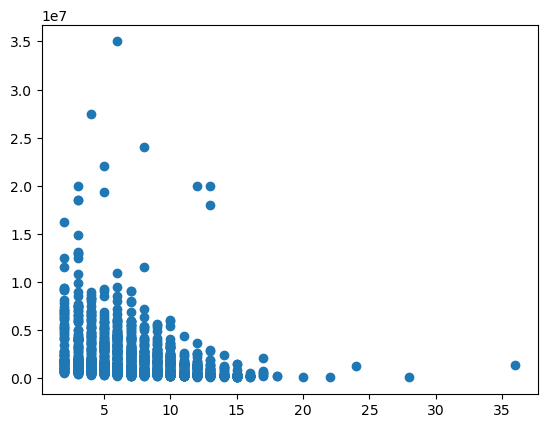

In [85]:

plt.scatter(df_new['Year'],df_new['Price'])

In [86]:
correlation.loc['Price','Year']

0.31139953589272346

In [87]:
corr=df_new.corr()

In [88]:
numeric_features= df_new.select_dtypes(['int64','float64'])

In [89]:
numeric_features.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'owner_encoded',
       'Combined_Power_hp', 'power_rpm_ratio'],
      dtype='object')

In [90]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,7,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,10,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,13,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,5,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,6,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,10,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,11,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,6,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


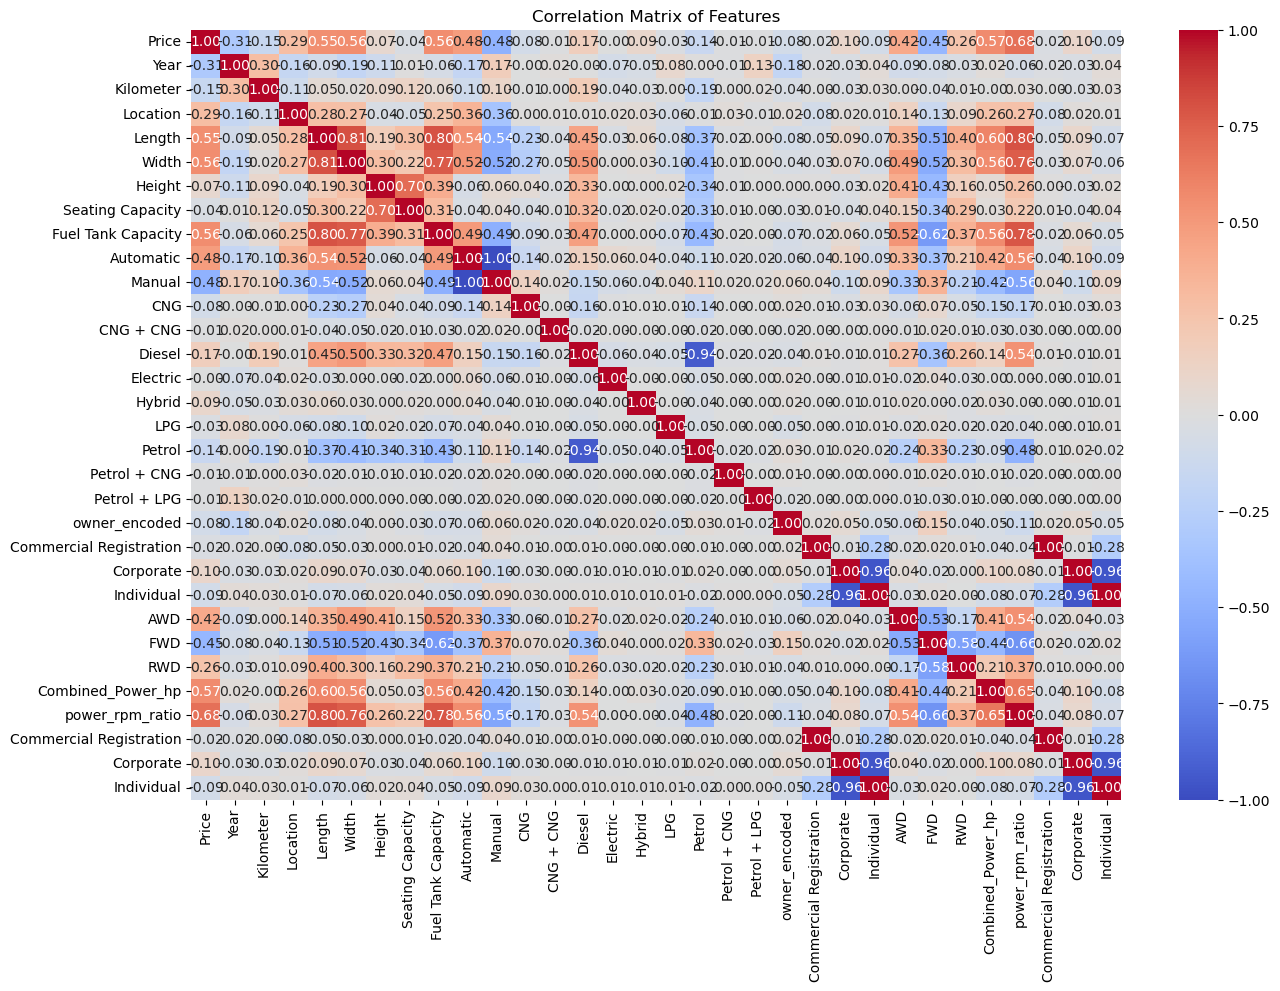

In [91]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

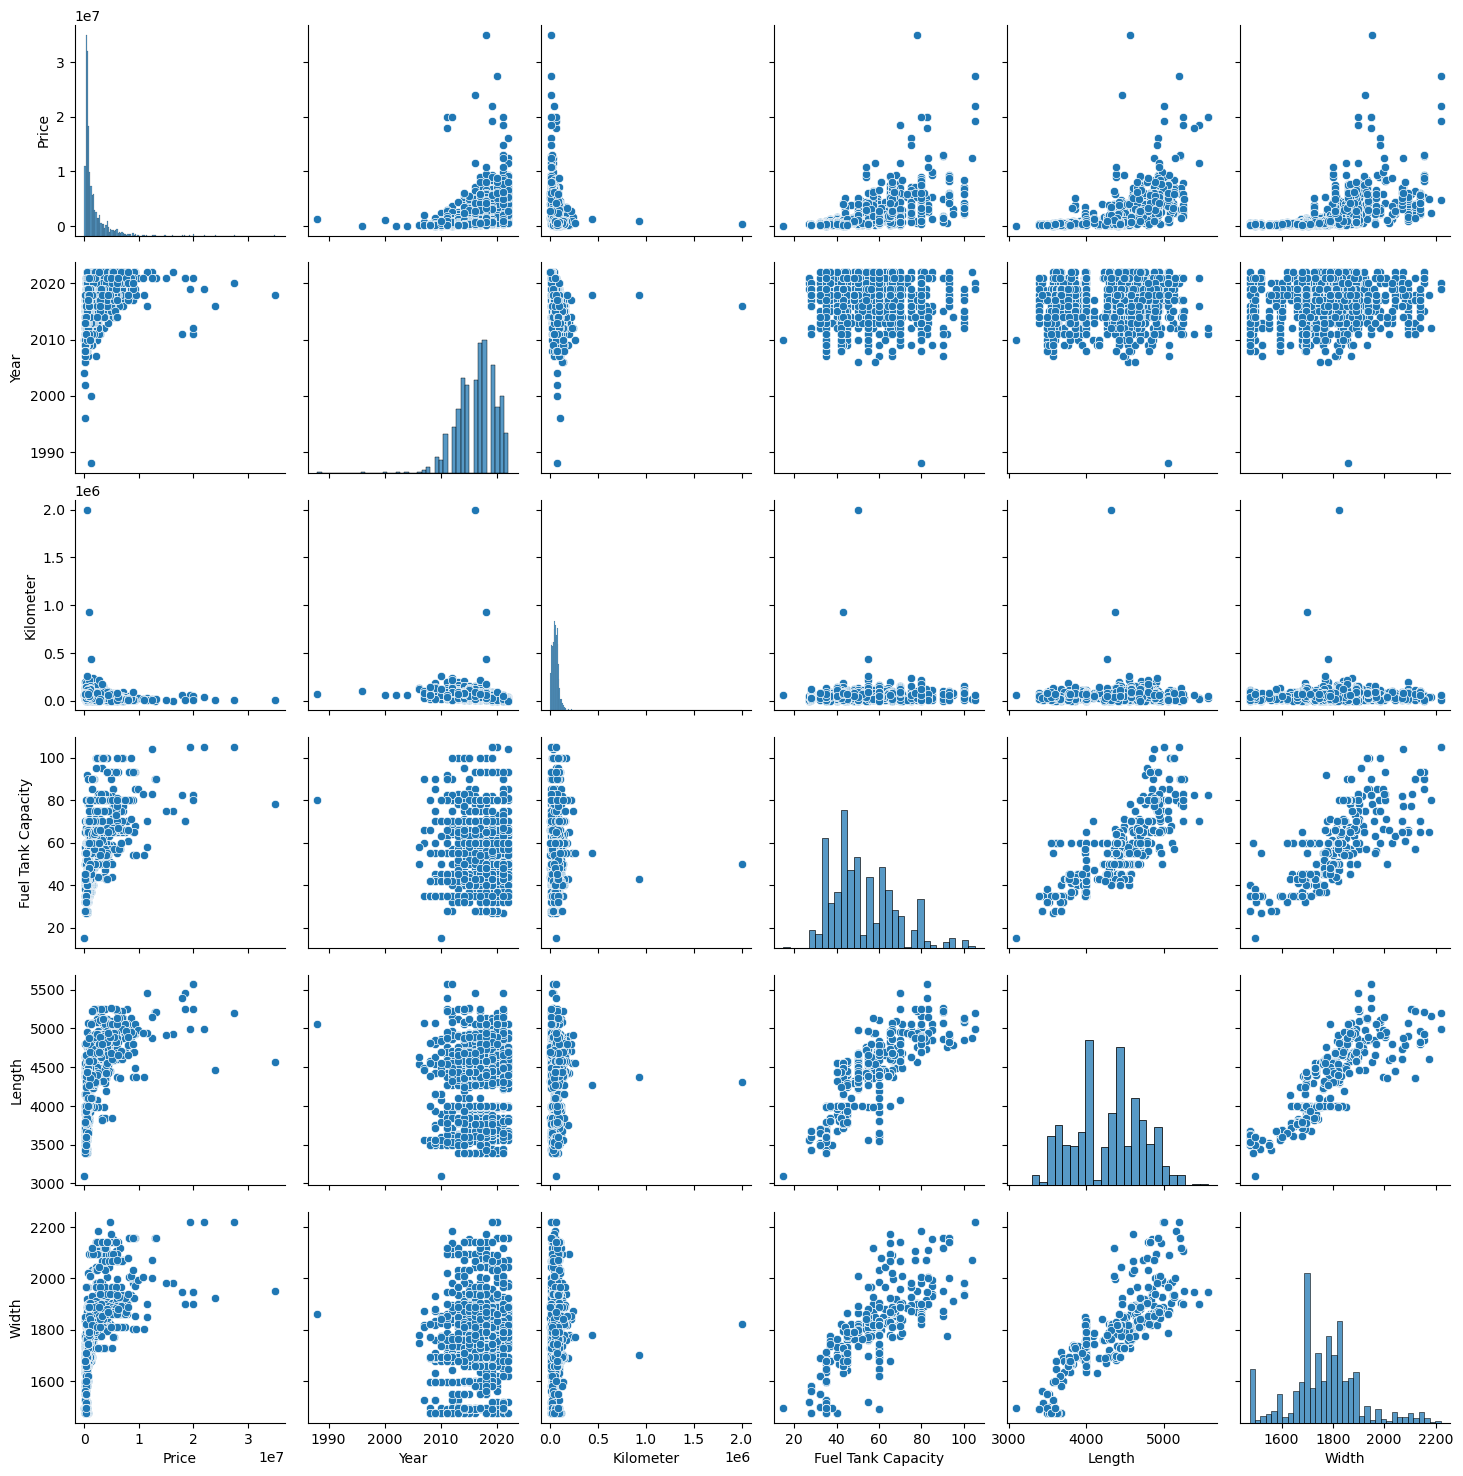

In [92]:
sns.pairplot(df[['Price', 'Year', 'Kilometer', 'Fuel Tank Capacity', 'Length', 'Width']])
plt.show()


In [93]:
numerical_features=df_new.select_dtypes(include=['number']).columns.tolist()

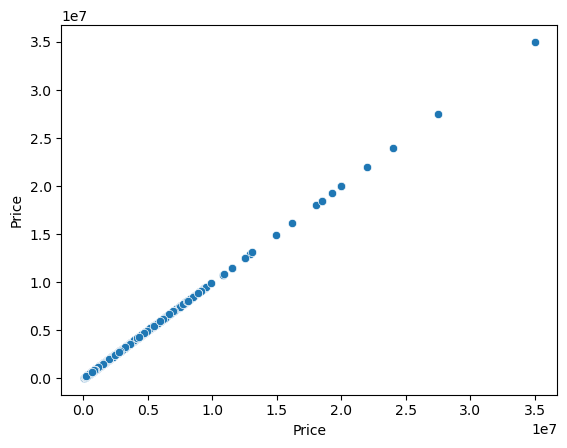

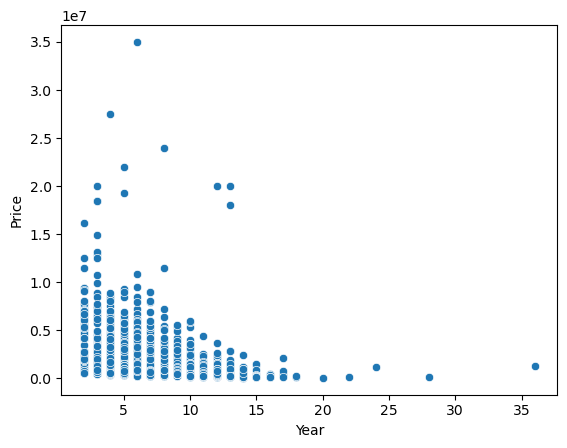

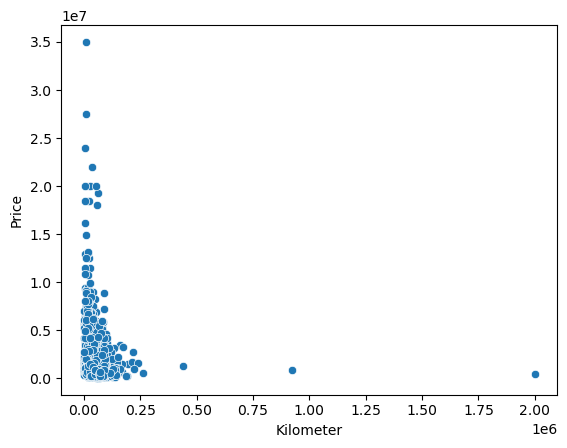

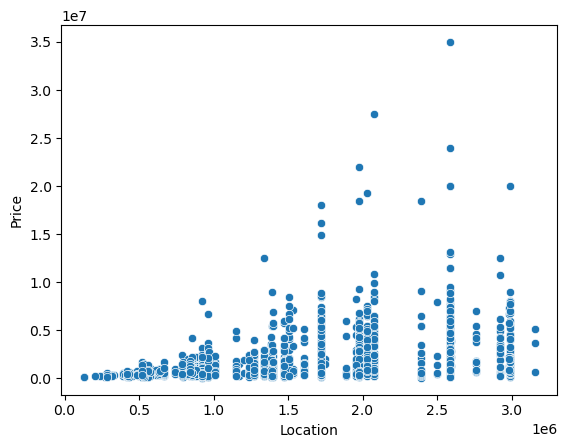

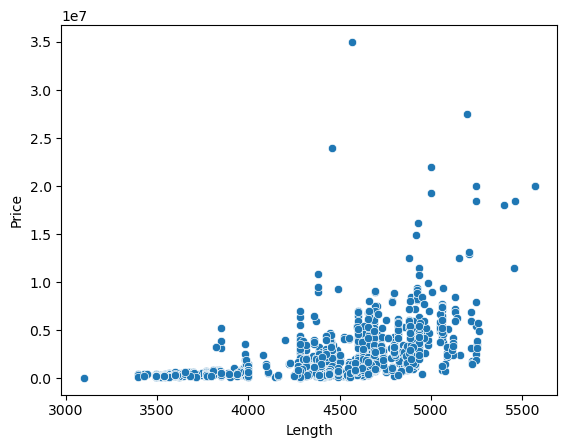

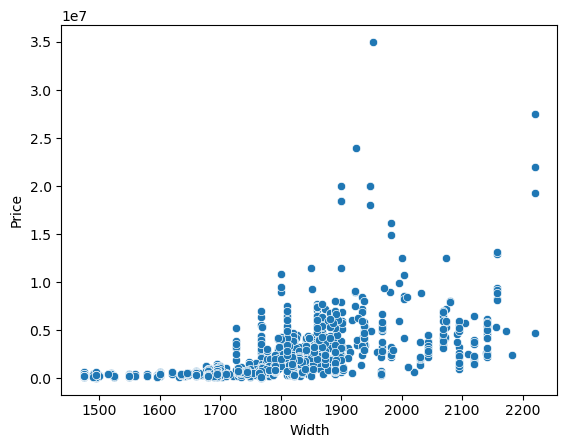

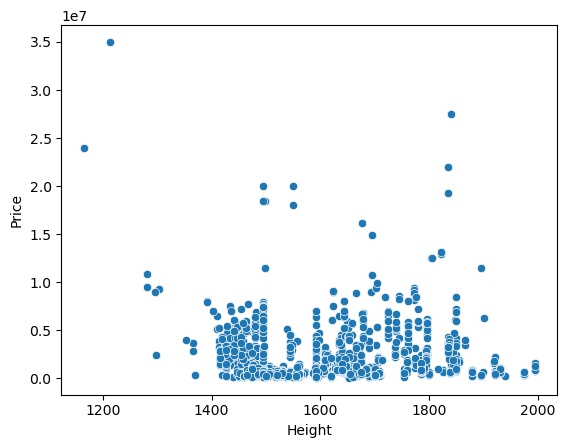

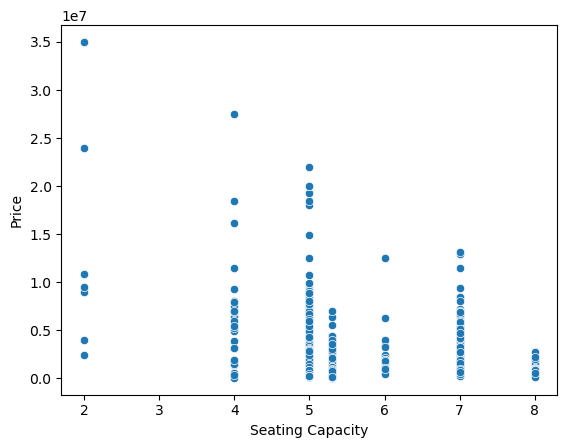

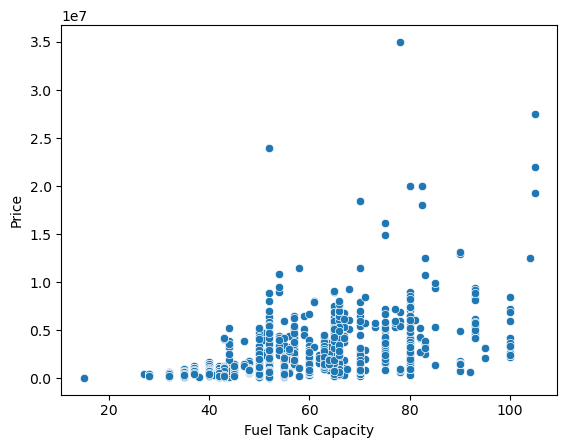

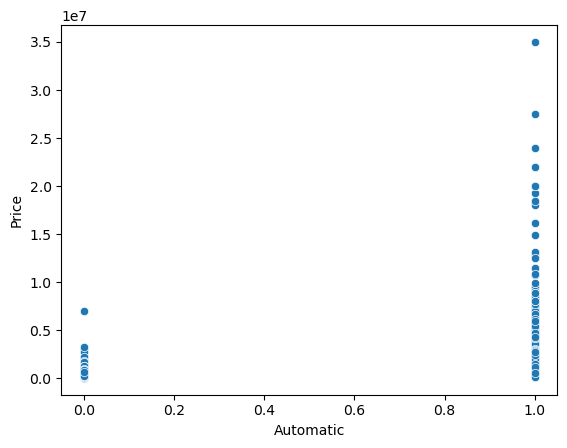

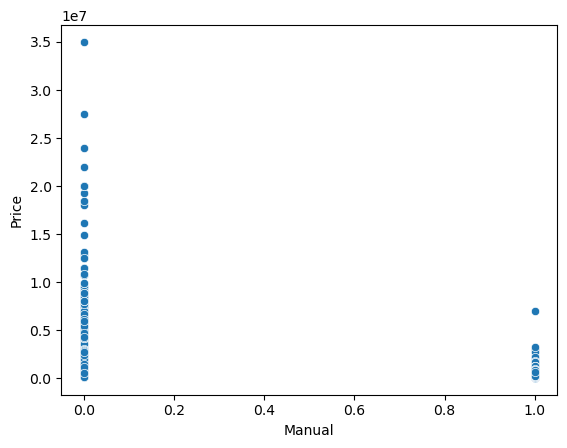

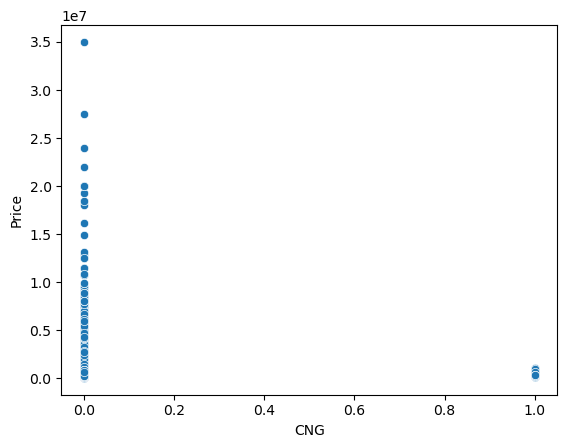

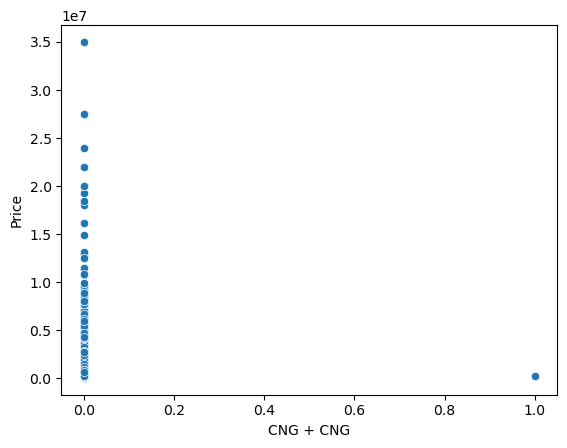

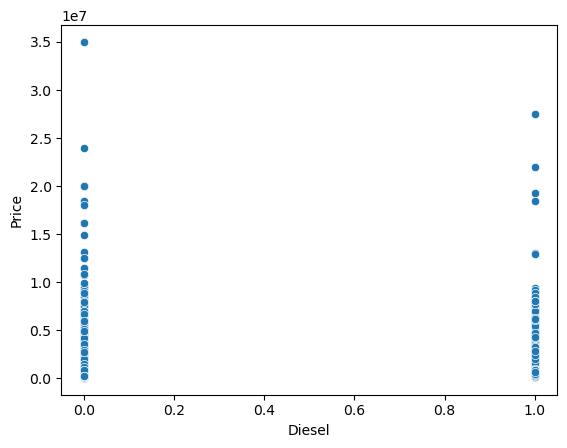

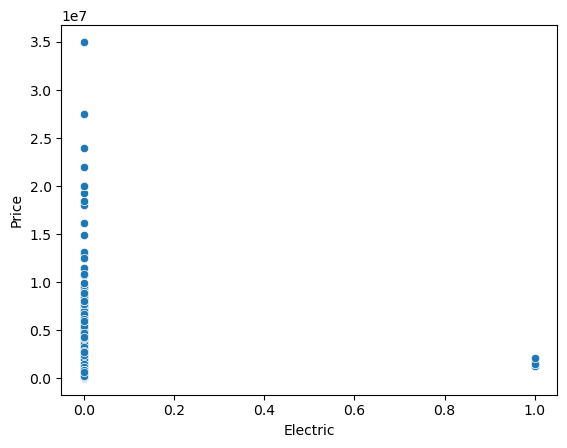

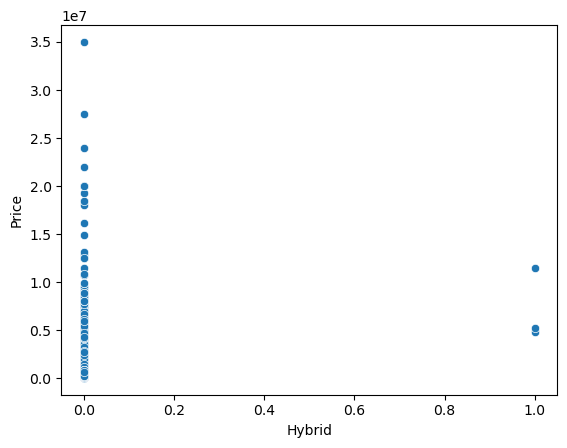

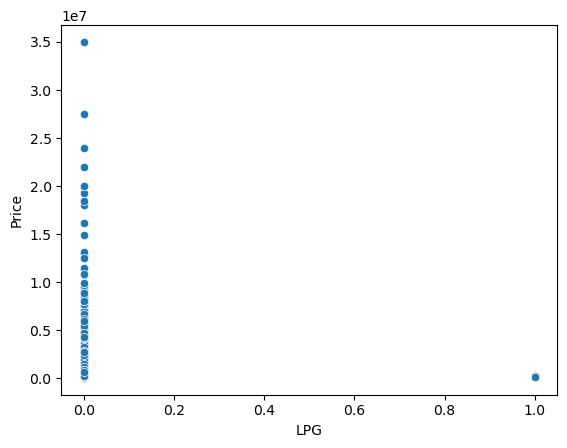

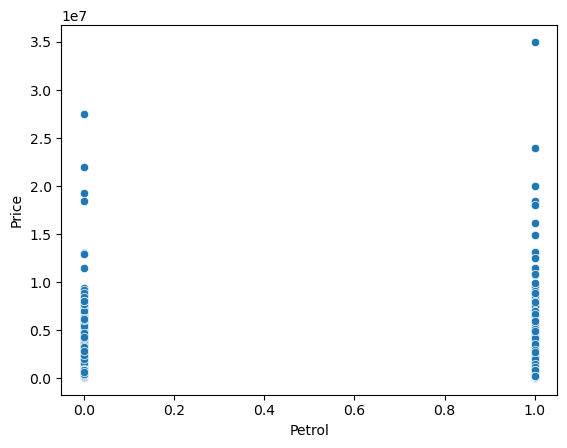

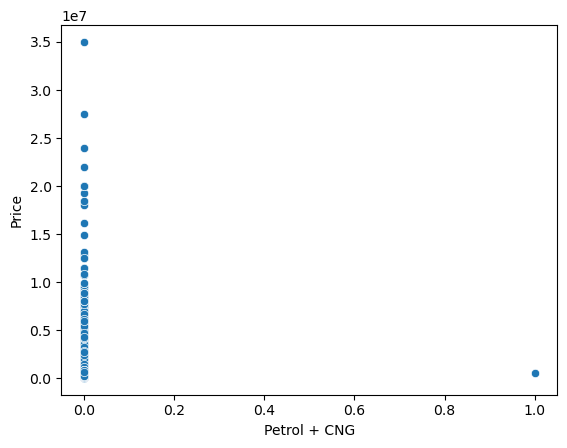

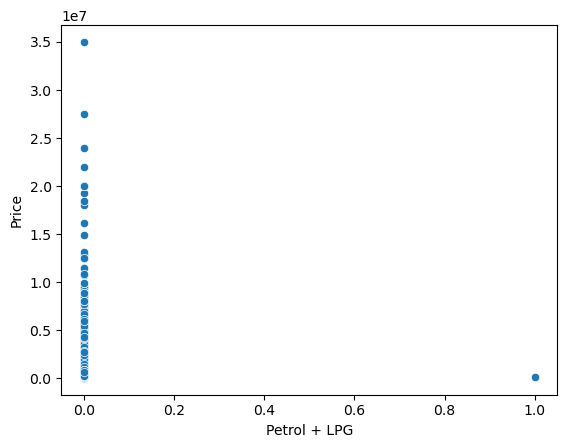

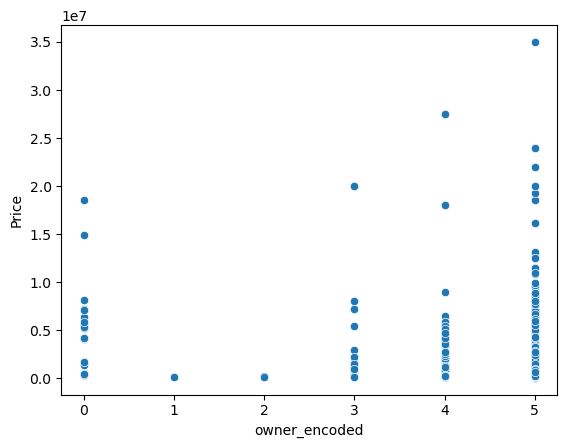

ValueError: Data must be 1-dimensional

In [94]:
for i in numerical_features:
    sns.scatterplot(x=df_new[i], y=df_new['Price'])
    plt.show()
    

In [ ]:
x=[1,2,3,4,5,10,43,24,78,65]
y=[34,54,12,31,98,68,52,56,98,76]
sns.scatterplot([x,y])

In [ ]:
print(df_new[numerical_features].dtypes)

In [ ]:
df_new.isna().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_new[i], y=df_new['Price'])
    plt.title(f'Price vs {i}')
    plt.show()


In [ ]:
df_new

In [ ]:
numerical_features

In [ ]:
numerical_features=['Price',
 'Year',
 'Kilometer',
 'Location',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio',
]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of columns for subplots
n_cols = 3  # Set number of columns to 3
n_rows = (len(numerical_features) // n_cols) + 1  # Calculate number of rows dynamically

plt.figure(figsize=(18, n_rows * 5))  # Increase the figure size for better spacing

# Loop through numerical features and create boxplots
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_new[col], data=df_new)
    plt.title(f'Boxplot of {col}', fontsize=12)  # Make title font smaller

plt.tight_layout(pad=2.0)  # Add padding to prevent overlap of titles and labels
plt.show()


In [ ]:
for i in numerical_features:
    plt.figure(figsize=(10,6))
    plt.subplot(3,3,1)
    sns.histplot(df_new[i],kde=True,bins=30)

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Seating Capacity',y='Price',data=df_new)
plt.show()

# Feature Engineering

In [ ]:
df_new

In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
numerical_features

In [ ]:
scaler= StandardScaler()

In [ ]:
df_new[numerical_features]=scaler.fit_transform(df_new[numerical_features])

In [ ]:
df_new.corr()

In [ ]:
df_new

In [116]:
df_new['Volume']= df_new['Length']*df_new['Width']*df_new['Height']

In [117]:
df_new.shape

(2059, 34)

In [118]:
df_new['Distance per year']= df_new['Kilometer']/df_new['Year']

In [119]:
df_new1= df_new.drop(['Length','Width','Height','Kilometer'],axis=1)

In [120]:
numerical_features=['Price',
 'Year',
 'Location',
 'Volume','Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [121]:
numerical_features

['Price',
 'Year',
 'Location',
 'Volume',
 'Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [122]:
df_new1

,Price,Year,Location,Seating Capacity,Fuel Tank Capacity,Automatic,Manual,CNG,CNG + CNG,Diesel,...,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Distance per year,Volume
0,505000,7,1.977764e+06,5.0,35.00000,0,1,0,0,0,...,0,1,0,68.881641,0.014500,0,1,0,12450.000000,1.008832e+10
1,450000,10,1.475745e+06,5.0,42.00000,0,1,0,0,1,...,0,1,0,53.363963,0.018500,0,0,1,7500.000000,1.052972e+10
2,220000,13,9.643333e+05,5.0,35.00000,0,1,0,0,0,...,0,1,0,63.341282,0.013167,0,0,1,5153.846154,8.863016e+09
3,799000,5,7.424000e+05,5.0,37.00000,0,1,0,0,0,...,0,1,0,66.648781,0.013667,0,0,1,7500.000000,1.052663e+10
4,1950000,6,1.721570e+06,7.0,55.00000,0,1,0,0,1,...,0,0,1,67.435197,0.043529,0,0,1,11500.000000,1.555376e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,2.980400e+06,7.0,70.00000,0,1,0,0,1,...,0,1,0,74.147822,0.036800,0,0,1,11287.500000,1.546819e+10
2055,275000,10,1.507257e+06,5.0,32.00000,0,1,0,0,0,...,0,1,0,42.129444,0.010000,0,0,1,8300.000000,8.125875e+09
2056,240000,11,1.149000e+06,5.0,45.00000,0,1,0,0,0,...,0,1,0,57.296044,0.011200,0,0,1,6636.363636,9.097981e+09
2057,4290000,6,1.385207e+06,5.0,65.00000,1,0,0,0,1,...,0,0,1,98.302036,0.047000,0,0,1,10079.000000,1.363704e+10


In [123]:
Irrelevant_columns=[]
for i in numerical_features:
    corr= df_new1['Price'].corr(df_new1[i])
    if corr<0.2 and corr>-0.2:
        Irrelevant_columns.append(i)
    

In [124]:
Irrelevant_columns

['Distance per year', 'Seating Capacity']

In [125]:
numerical_features

['Price',
 'Year',
 'Location',
 'Volume',
 'Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [126]:
numerical_features=['Price',
 'Year',
 'Location',
 'Volume','Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [127]:
df_new1['Price'].corr(df_new1['Price'])

1.0

In [128]:
df_new2= df_new1.drop(Irrelevant_columns,axis=1)

In [129]:
df_new2.shape

(2059, 28)

In [130]:
df_new2

,Price,Year,Location,Fuel Tank Capacity,Automatic,Manual,CNG,CNG + CNG,Diesel,Electric,...,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Volume
0,505000,7,1.977764e+06,35.00000,0,1,0,0,0,0,...,0,0,1,0,68.881641,0.014500,0,1,0,1.008832e+10
1,450000,10,1.475745e+06,42.00000,0,1,0,0,1,0,...,1,0,1,0,53.363963,0.018500,0,0,1,1.052972e+10
2,220000,13,9.643333e+05,35.00000,0,1,0,0,0,0,...,1,0,1,0,63.341282,0.013167,0,0,1,8.863016e+09
3,799000,5,7.424000e+05,37.00000,0,1,0,0,0,0,...,1,0,1,0,66.648781,0.013667,0,0,1,1.052663e+10
4,1950000,6,1.721570e+06,55.00000,0,1,0,0,1,0,...,1,0,0,1,67.435197,0.043529,0,0,1,1.555376e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,2.980400e+06,70.00000,0,1,0,0,1,0,...,1,0,1,0,74.147822,0.036800,0,0,1,1.546819e+10
2055,275000,10,1.507257e+06,32.00000,0,1,0,0,0,0,...,1,0,1,0,42.129444,0.010000,0,0,1,8.125875e+09
2056,240000,11,1.149000e+06,45.00000,0,1,0,0,0,0,...,1,0,1,0,57.296044,0.011200,0,0,1,9.097981e+09
2057,4290000,6,1.385207e+06,65.00000,1,0,0,0,1,0,...,1,0,0,1,98.302036,0.047000,0,0,1,1.363704e+10


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
df_y= df_new2['Price']

In [133]:
df_x= df_new2.drop(['Price'],axis=1)

In [134]:
x_train,x_temp,y_train,y_temp= train_test_split(df_x,df_y,test_size=0.3,random_state=42)

In [135]:
x_val,x_test,y_val,y_test= train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rf=RandomForestRegressor()

In [138]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [139]:
y_val_pred= rf.predict(x_val)

In [140]:
y_val.shape

(309,)

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
mse=mean_squared_error(y_val,y_val_pred)

In [143]:
mse

701961687185.2742

In [144]:
df_new2

,Price,Year,Location,Fuel Tank Capacity,Automatic,Manual,CNG,CNG + CNG,Diesel,Electric,...,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Volume
0,505000,7,1.977764e+06,35.00000,0,1,0,0,0,0,...,0,0,1,0,68.881641,0.014500,0,1,0,1.008832e+10
1,450000,10,1.475745e+06,42.00000,0,1,0,0,1,0,...,1,0,1,0,53.363963,0.018500,0,0,1,1.052972e+10
2,220000,13,9.643333e+05,35.00000,0,1,0,0,0,0,...,1,0,1,0,63.341282,0.013167,0,0,1,8.863016e+09
3,799000,5,7.424000e+05,37.00000,0,1,0,0,0,0,...,1,0,1,0,66.648781,0.013667,0,0,1,1.052663e+10
4,1950000,6,1.721570e+06,55.00000,0,1,0,0,1,0,...,1,0,0,1,67.435197,0.043529,0,0,1,1.555376e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,2.980400e+06,70.00000,0,1,0,0,1,0,...,1,0,1,0,74.147822,0.036800,0,0,1,1.546819e+10
2055,275000,10,1.507257e+06,32.00000,0,1,0,0,0,0,...,1,0,1,0,42.129444,0.010000,0,0,1,8.125875e+09
2056,240000,11,1.149000e+06,45.00000,0,1,0,0,0,0,...,1,0,1,0,57.296044,0.011200,0,0,1,9.097981e+09
2057,4290000,6,1.385207e+06,65.00000,1,0,0,0,1,0,...,1,0,0,1,98.302036,0.047000,0,0,1,1.363704e+10


In [145]:
df_new2.shape

(2059, 28)

In [146]:
df_new1

,Price,Year,Location,Seating Capacity,Fuel Tank Capacity,Automatic,Manual,CNG,CNG + CNG,Diesel,...,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Distance per year,Volume
0,505000,7,1.977764e+06,5.0,35.00000,0,1,0,0,0,...,0,1,0,68.881641,0.014500,0,1,0,12450.000000,1.008832e+10
1,450000,10,1.475745e+06,5.0,42.00000,0,1,0,0,1,...,0,1,0,53.363963,0.018500,0,0,1,7500.000000,1.052972e+10
2,220000,13,9.643333e+05,5.0,35.00000,0,1,0,0,0,...,0,1,0,63.341282,0.013167,0,0,1,5153.846154,8.863016e+09
3,799000,5,7.424000e+05,5.0,37.00000,0,1,0,0,0,...,0,1,0,66.648781,0.013667,0,0,1,7500.000000,1.052663e+10
4,1950000,6,1.721570e+06,7.0,55.00000,0,1,0,0,1,...,0,0,1,67.435197,0.043529,0,0,1,11500.000000,1.555376e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,2.980400e+06,7.0,70.00000,0,1,0,0,1,...,0,1,0,74.147822,0.036800,0,0,1,11287.500000,1.546819e+10
2055,275000,10,1.507257e+06,5.0,32.00000,0,1,0,0,0,...,0,1,0,42.129444,0.010000,0,0,1,8300.000000,8.125875e+09
2056,240000,11,1.149000e+06,5.0,45.00000,0,1,0,0,0,...,0,1,0,57.296044,0.011200,0,0,1,6636.363636,9.097981e+09
2057,4290000,6,1.385207e+06,5.0,65.00000,1,0,0,0,1,...,0,0,1,98.302036,0.047000,0,0,1,10079.000000,1.363704e+10


In [147]:
df_y1= df_new1['Price']
df_x1= df_new1.drop(['Price'],axis=1)
x_train1,x_temp1,y_train1,y_temp1= train_test_split(df_x1,df_y1,test_size=0.3,random_state=42)
x_val1,x_test1,y_val1,y_test1= train_test_split(x_temp1,y_temp1,test_size=0.5,random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor()
rf1.fit(x_train1,y_train1)


RandomForestRegressor()

In [148]:
y_val_pred1= rf1.predict(x_val1)
mse1=mean_squared_error(y_val1,y_val_pred1)

In [149]:
mse1

988430566256.2888

In [150]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf1, x_temp1, y_temp1, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores

In [151]:
print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {cv_mse_scores.mean()}")

Cross-Validation MSE Scores: [2.17211196e+12 9.08925648e+11 8.12701784e+11 6.19115651e+12
 7.63993491e+11]
Mean Cross-Validation MSE: 2169777878894.8188


In [152]:
from sklearn.metrics import r2_score

In [153]:
r2= r2_score(y_val,y_val_pred)

In [154]:
r2

0.8963615485652815

In [155]:
r2_1= r2_score(y_val1,y_val_pred1)

In [156]:
r2_1

0.8540669453794476

In [157]:
y_test_pred= rf.predict(x_test)

In [158]:
y_test_pred1= rf1.predict(x_test1)

In [159]:
r2_score_test= r2_score(y_test,y_test_pred)
r2_score_test

0.6804422931434064

In [160]:
r2_score_test1= r2_score(y_test1,y_test_pred1)
r2_score_test1

0.7637004714346352

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)
y_gb_pred = gb_model.predict(x_test)

test_mse_gb = mean_squared_error(y_test, y_gb_pred)
test_r2_gb = r2_score(y_test, y_gb_pred)

print(f"Gradient Boosting MSE: {test_mse_gb}")
print(f"Gradient Boosting R²: {test_r2_gb}")

Gradient Boosting MSE: 2676468259671.531
Gradient Boosting R²: 0.6444317772445536


In [162]:
y_gb_val_pred= gb_model.predict(x_val)
r2_val_gb=r2_score(y_val, y_gb_val_pred)

print(f"Gradient Boosting R² on validation: {r2_val_gb}")

Gradient Boosting R² on validation: 0.829411924254547


In [163]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [164]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1)


In [165]:
random_search.fit(x_train, y_train)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\Lib\site-pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193F7857F50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193F787A590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193F75E6C50>},
                   random_state=42, scoring='r2')

In [166]:
print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}


In [167]:
best_rf_model = random_search.best_estimator_

In [168]:
y_test_pred_tuning = best_rf_model.predict(x_test)
test_r2_tuning = r2_score(y_test, y_test_pred_tuning)

print(f"Test R² of the best model: {test_r2_tuning}")

Test R² of the best model: 0.623836215743564


In [169]:
! pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [170]:
from xgboost import XGBRegressor

In [177]:

import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)



# Initialize the XGBoost model with hyperparameters
xgb_model = XGBRegressor(random_state=42, n_estimators=500, learning_rate=0.01, max_depth=5)

# Fit the model on the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model's performance using R²
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
print(f"XGBoost Test R²: {test_r2_xgb}")


XGBoost Test R²: 0.6525566577235351


In [196]:
import joblib

# Save the model to a file
joblib.dump(rf1, 'car_price_model.pkl')

# Load the model from the file
loaded_model = joblib.load('car_price_model.pkl')


In [180]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/7c/2e/60e624bbe16f4baa45cb6e48a1ee05edd48a0a14cceec4d7eec9258755ac/streamlit-1.38.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc4


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
df_new1

,Price,Year,Location,Seating Capacity,Fuel Tank Capacity,Automatic,Manual,CNG,CNG + CNG,Diesel,...,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Distance per year,Volume
0,505000,7,1.977764e+06,5.0,35.00000,0,1,0,0,0,...,0,1,0,68.881641,0.014500,0,1,0,12450.000000,1.008832e+10
1,450000,10,1.475745e+06,5.0,42.00000,0,1,0,0,1,...,0,1,0,53.363963,0.018500,0,0,1,7500.000000,1.052972e+10
2,220000,13,9.643333e+05,5.0,35.00000,0,1,0,0,0,...,0,1,0,63.341282,0.013167,0,0,1,5153.846154,8.863016e+09
3,799000,5,7.424000e+05,5.0,37.00000,0,1,0,0,0,...,0,1,0,66.648781,0.013667,0,0,1,7500.000000,1.052663e+10
4,1950000,6,1.721570e+06,7.0,55.00000,0,1,0,0,1,...,0,0,1,67.435197,0.043529,0,0,1,11500.000000,1.555376e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,2.980400e+06,7.0,70.00000,0,1,0,0,1,...,0,1,0,74.147822,0.036800,0,0,1,11287.500000,1.546819e+10
2055,275000,10,1.507257e+06,5.0,32.00000,0,1,0,0,0,...,0,1,0,42.129444,0.010000,0,0,1,8300.000000,8.125875e+09
2056,240000,11,1.149000e+06,5.0,45.00000,0,1,0,0,0,...,0,1,0,57.296044,0.011200,0,0,1,6636.363636,9.097981e+09
2057,4290000,6,1.385207e+06,5.0,65.00000,1,0,0,0,1,...,0,0,1,98.302036,0.047000,0,0,1,10079.000000,1.363704e+10


In [188]:
df_new1.columns

Index(['Price', 'Year', 'Location', 'Seating Capacity', 'Fuel Tank Capacity',
       'Automatic', 'Manual', 'CNG', 'CNG + CNG', 'Diesel', 'Electric',
       'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG', 'Petrol + LPG',
       'owner_encoded', 'Commercial Registration', 'Corporate', 'Individual',
       'AWD', 'FWD', 'RWD', 'Combined_Power_hp', 'power_rpm_ratio',
       'Commercial Registration', 'Corporate', 'Individual',
       'Distance per year', 'Volume'],
      dtype='object')

In [187]:
df_new1['Year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        7
1       10
2       13
3        5
4        6
        ..
2054     8
2055    10
2056    11
2057     6
2058     7
Name: Year, Length: 2059, dtype: int64>

In [192]:
df_new1['Corporate']

,Corporate,Corporate
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2054,0,0
2055,0,0
2056,0,0
2057,0,0


In [194]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG', 'CNG + CNG',
       'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG',
       'Petrol + LPG', 'owner_encoded', 'Commercial Registration', 'Corporate',
       'Individual', 'AWD', 'FWD', 'RWD', 'Combined_Power_hp',
       'power_rpm_ratio'],
      dtype='object')

In [197]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('car_price_model.pkl')

# Title of the Streamlit app
st.title("Car Price Prediction")

# Input fields for the user to provide car details
age = st.number_input("How old is the car (in years)?", min_value=0, step=1)
seating_capacity = st.number_input("Seating Capacity", min_value=1, max_value=10, step=1)
fuel_tank_capacity = st.number_input("Fuel Tank Capacity (liters)", min_value=10, max_value=100, step=1)
transmission = st.selectbox("Transmission Type", options=["Automatic", "Manual"])
fuel_type = st.selectbox("Fuel Type", options=['CNG', 'CNG + CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'])
owner_type = st.selectbox("Owner Type", options=["Corporate", "Individual"])
drivetrain = st.selectbox("Drive Type", options=["AWD", "FWD", "RWD"])

# Additional input for power and torque to calculate Combined Power HP
power = st.number_input("Power (kW)", min_value=0.0, step=0.1)
torque = st.number_input("Torque (Nm)", min_value=0.0, step=0.1)
rpm = st.number_input("RPM", min_value=500, step=100)

# Calculate combined_power_hp and power_rpm_ratio
combined_power_hp = (torque * power) / 745.7
power_rpm_ratio = power / rpm

# Prepare the input for the model (Assume other required features are set to 0 or ignored)
model_input = np.array([[age, seating_capacity, fuel_tank_capacity, 
                         1 if transmission == "Automatic" else 0,  # Encoding transmission
                         # Encoding fuel type (dummy variables)
                         1 if fuel_type == 'CNG' else 0, 1 if fuel_type == 'Diesel' else 0, 1 if fuel_type == 'Petrol' else 0,
                         1 if owner_type == "Corporate" else 0,  # Encoding owner type
                         1 if drivetrain == "AWD" else 0, 1 if drivetrain == "FWD" else 0, 1 if drivetrain == "RWD" else 0,
                         combined_power_hp, power_rpm_ratio]])

# Predict button
if st.button("Predict Price"):
    # Make the prediction using the loaded model
    predicted_price = model.predict(model_input)
    st.success(f"The predicted price of the car is: ₹{predicted_price[0]:,.2f}")


2024-10-01 09:12:24.771 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 09:12:25.633 
  command:

    streamlit run C:\Users\Lenovo\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-01 09:12:25.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 09:12:25.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 09:12:25.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 09:12:25.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-01 09:12:25.645 Session state does not function when running a script without `streamlit run`
2024-10-01 09:12:25.647 Thread 'MainThread': missing ScriptRunContext!

In [1]:
!pip install streamlit



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
